# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose # [x, y, z, phi, theta, psi]
init_velocities = np.array([0., 0., 0.])         # initial velocities # x_velocity, y_velocity, z_velocity
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities # phi_velocity, theta_velocity, psi_velocity
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    
    # reset environment
    initial_state = task.reset ()
    print ('initial state: {} {} {}'.format (initial_state[:6], initial_state[6:12], initial_state[12:]))
    
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        
        if done:
            break

initial state: [ 0.  0. 10.  0.  0.  0.] [ 0.  0. 10.  0.  0.  0.] [ 0.  0. 10.  0.  0.  0.]


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation. Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

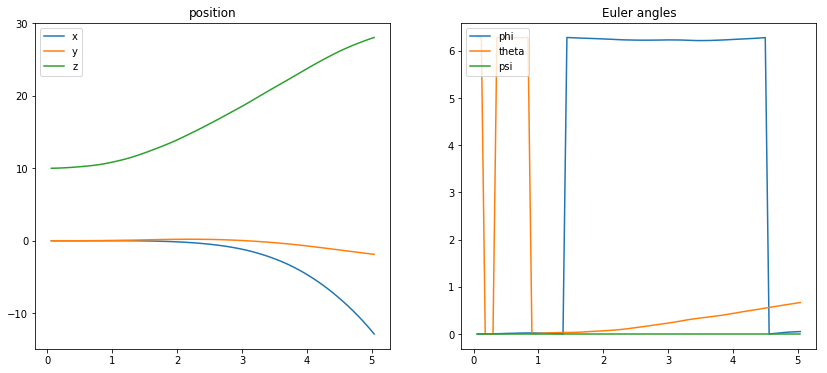

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots (1, 2)

axs[0].plot(results['time'], results['x'], label='x')
axs[0].plot(results['time'], results['y'], label='y')
axs[0].plot(results['time'], results['z'], label='z')
axs[0].legend(loc='upper left')
axs[0].set (title='position')

axs[1].plot(results['time'], results['phi'], label='phi')
axs[1].plot(results['time'], results['theta'], label='theta')
axs[1].plot(results['time'], results['psi'], label='psi')
axs[1].legend(loc='upper left')
axs[1].set (title='Euler angles')

_ = plt.ylim()
fig.set_size_inches ((14., 6.), forward=True)
plt.show()

The next code cell visualizes the velocity of the quadcopter. before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

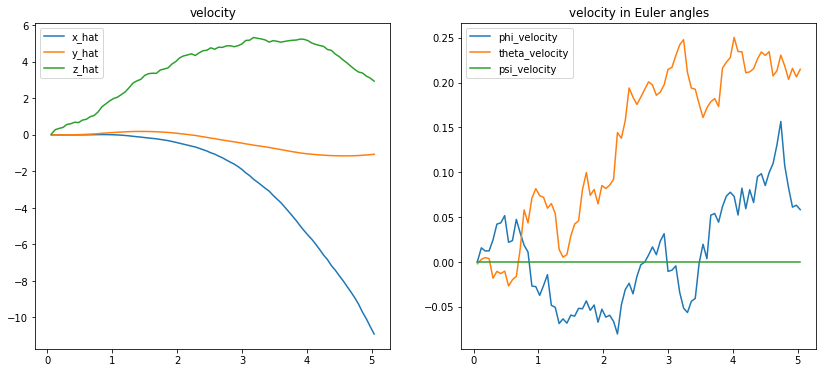

In [4]:
fig, axs = plt.subplots (1, 2)

axs[0].plot(results['time'], results['x_velocity'], label='x_hat')
axs[0].plot(results['time'], results['y_velocity'], label='y_hat')
axs[0].plot(results['time'], results['z_velocity'], label='z_hat')
axs[0].legend(loc='upper left')
axs[0].set (title='velocity')

axs[1].plot(results['time'], results['phi_velocity'], label='phi_velocity')
axs[1].plot(results['time'], results['theta_velocity'], label='theta_velocity')
axs[1].plot(results['time'], results['psi_velocity'], label='psi_velocity')
axs[1].legend(loc='upper left')
axs[1].set (title='velocity in Euler angles')

_ = plt.ylim()
fig.set_size_inches ((14., 6.), forward=True)
plt.show()

Finally, you can use the code cell below to print the agent's choice of actions.  

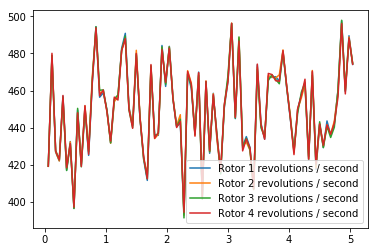

In [5]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [6]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.86589052  -1.87308667  28.05058779   0.05058538   0.66598878
   0.        ]
[-10.90238846  -1.06174248   2.94452355]
[0.05839531 0.21490837 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [7]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -2.121 (best =   0.117), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

***
### RL system - General
<img src=".\stuff\rl.system.gen.PNG" width="50%" \>

In general a MDP consits of
- a Model (defined by transitions T)
- a finite State space S
- a finite Action space A
- Rewards R

RL algorithms can be divided into
- model-based, algorithms need: T and R
- value-based, model-free, algorithms need: Q
- policy-based

Basically, all RL algorithms work well with discrete spaces (States, Actions)

### Quadcopter
- episodic task
- Goal: reach a target position - Pos (x, y, z) = (0, 0, 10)

#### State space S
Currently, every state holds the 6 degrees of freedom
- 3 translational, position (x, y, z) and
- 3 rotational, Euler angles ($\varphi, \vartheta, \psi$)

The state space is large and values are continuous, but has boundaries given by the physics simulation. Exceeding the boundaries or exceeding the runtime leads to termination of the episode.

By that, we need to use function approximation to enable the agent to choose correct actions and minimize the computation time.

Action repeats are used, [...] in order to make the problems approximately fully observable in the high dimensional environment [...]. For each timestep of the agent, we step the simulation 3 timesteps, repeating the agent’s action and rendering each time (arXiv:1509.02971, p. 5).

In [30]:
task = Task ()

print ('Size of a state (3 action repeats * 6 dof):', task.state_size)

print ('S lower boundary', task.sim.lower_bounds)
print ('S upper boundary', task.sim.upper_bounds)

Size of a state (3 action repeats * 6 dof): 18
S lower boundary [-150. -150.    0.]
S upper boundary [150. 150. 300.]


#### Action space A
One action consits of 4 independent values, representing the thrust / rotor speeds.

The action space values are continuous.

In [36]:
print ('Size of an action:', task.action_size)
print ('A boundaries:', (task.action_low, task.action_high))

Size of an action: 4
A boundaries: (0, 900)


#### Reward function R
Currently, the reward function is
- R = 1 if target positon reached
- else: R = 1 - 30% of absolute difference between actual positon and target position

Thus, the reward will be a high negative scalar, if the quadcopter is far away from the target position

### My Environment
The environment is derived by the given class 'Task'.

In [9]:
import task

class MyTask (Task):
    
    def __init__ (self):
        Task.__init__ (self)
        
        # Goal
        self.target_pos = np.array ([0., 0., 10.])
    
    # reward function (overwrite)
    def get_reward (self):
        return super ().get_reward ()
    

env = MyTask ()

### My Agent
The agent is defined in <a href=".\agents\agent.py">agent.py</a>.

This agent discretizes the actions:
- 3 actions: -1 = 'decrease_speed', 0 = 'no_action', 1 = 'increase_speed'
- if boundaries of action space exceeded, then 'no_action' is taken

Actions upon cases:
Quadcopter has 4 motors
<pre>
       front
     (1)   (2)
        \ /
right    o     right
        / \
     (3)   (4)
        rear
</pre>
Motors (1) and (4) rotate in dir1, Motors (2) and (3) rotate in dir2

- pitch +: increase speed of (3) and (4)
- pitch -: increase speed of (1) and (2)
- roll +: increase speed of (1) and (3)
- roll -: increase speed of (2) and (4)
- yaw +: increase speed of (2) and (3)
- yaw -: increase speed of (1) and (4)

#### Approach
- continuous S
- continuous A
- Q-Learning
  - off-policy method: better overcomes exploration-exploitation dilemma
  - supports batch learning (for experience replay)
- option: experience replay
- option: function approximation

In [21]:
#DQN
import tensorflow as tf



In [17]:
## TODO: Train your agent here.
# first try with discrete actions
from agents.agent import Agent

num_episodes = 1000
env = MyTask ()
agent = Agent ()

"""
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()
"""

for i_episode in range (1, num_episodes+1):
    # begin the episode
    state = env.reset ()
    print (state)

    while True:
        # agent selects an action
        action = agent.select_action (state)
        # agent performs the selected action
        next_state, reward, done, _ = env.step (action)

        # agent performs internal updates based on sampled experience
        agent.step (state, action, reward, next_state, done)

        # update the state (s <- s') to next time step
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
            i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
        break


Agnet uses SARSA
[ 0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0. 10.  0.  0.  0.]


TypeError: unhashable type: 'numpy.ndarray'

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

In [22]:
import gym
import numpy as np

# Create the Cart-Pole game environment
env = gym.make('CartPole-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [24]:
from agents import agent
import tensorflow as tf
import time


train_episodes = 1000
max_steps = 200
batch_size = 20

tf.reset_default_graph()
ag = agent.Agentv2 (state_size=4, action_size=2)


with tf.Session() as sess:
    #saver = tf.train.Saver ()
    sess.run (tf.global_variables_initializer())
    
    # Make a bunch of random actions and store the experiences
    # Start new episode
    env.reset()
    # Take one random step to get the pole and cart moving
    state, reward, done, _ = env.step(env.action_space.sample())
    for ii in range(20):

        # Make a random action
        action = env.action_space.sample()
        next_state, reward, done, _ = env.step(action)

        if done:
            # The simulation fails so no next state
            next_state = np.zeros(state.shape)
            # Add experience to memory
            ag.store ((state, action, reward, next_state))

            # Start new episode
            env.reset()
            # Take one random step to get the pole and cart moving
            state, reward, done, _ = env.step(env.action_space.sample())
        else:
            # Add experience to memory
            ag.store ((state, action, reward, next_state))
            state = next_state

    
    # GPI with DQN
    env.reset ()
    state, reward, done, _ = env.step (env.action_space.sample())
    
    step = 0
    rewards_list = []
    for ep in range (1, train_episodes):
        total_reward = 0
        t = 0
        while t < max_steps:
            step += 1
            # Uncomment this next line to watch the training
            # env.render ()

            # Explore or Exploit
            action = ag.act (state, step, sess)

            # Take action, get new state and reward
            next_state, reward, done, _ = env.step (action)

            total_reward += reward

            if done:
                # the episode ends so no next state
                next_state = np.zeros (state.shape)
                t = max_steps

                print('Episode: {}'.format(ep),
                      'Total reward: {}'.format(total_reward),
                      'Training loss: {:.4f}'.format(loss),
                      'Explore P: {:.4f}'.format(ag.explore_p))

                rewards_list.append((ep, total_reward))

                # Add experience to memory
                ag.store ((state, action, reward, next_state))

                # Start new episode
                env.reset ()
                # Take one random step to get the pole and cart moving
                state, reward, done, _ = env.step(env.action_space.sample())

            else:
                # Add experience to memory
                ag.store ((state, action, reward, next_state))
                state = next_state
                t += 1

            loss = ag.learn (batch_size, sess)
    
    #timestr = time.strftime("%Y%m%d-%H%M%S")
    #saver.save (sess, "agent.brain_"+timestr+".ckpt")

Episode: 1 Total reward: 10.0 Training loss: 1.0891 Explore P: 0.9990
Episode: 2 Total reward: 13.0 Training loss: 1.1562 Explore P: 0.9977
Episode: 3 Total reward: 25.0 Training loss: 1.1501 Explore P: 0.9953
Episode: 4 Total reward: 20.0 Training loss: 1.1318 Explore P: 0.9933
Episode: 5 Total reward: 24.0 Training loss: 1.1085 Explore P: 0.9909
Episode: 6 Total reward: 43.0 Training loss: 1.0847 Explore P: 0.9867
Episode: 7 Total reward: 27.0 Training loss: 1.0335 Explore P: 0.9841
Episode: 8 Total reward: 20.0 Training loss: 1.0612 Explore P: 0.9821
Episode: 9 Total reward: 8.0 Training loss: 0.9289 Explore P: 0.9814
Episode: 10 Total reward: 12.0 Training loss: 0.8802 Explore P: 0.9802
Episode: 11 Total reward: 25.0 Training loss: 0.9902 Explore P: 0.9778
Episode: 12 Total reward: 22.0 Training loss: 0.9924 Explore P: 0.9757
Episode: 13 Total reward: 26.0 Training loss: 0.8781 Explore P: 0.9731
Episode: 14 Total reward: 18.0 Training loss: 0.8359 Explore P: 0.9714
Episode: 15 Tota

Episode: 121 Total reward: 38.0 Training loss: 1.1132 Explore P: 0.7866
Episode: 122 Total reward: 17.0 Training loss: 0.0663 Explore P: 0.7853
Episode: 123 Total reward: 28.0 Training loss: 0.4118 Explore P: 0.7831
Episode: 124 Total reward: 24.0 Training loss: 0.4804 Explore P: 0.7812
Episode: 125 Total reward: 32.0 Training loss: 0.0528 Explore P: 0.7788
Episode: 126 Total reward: 26.0 Training loss: 0.4122 Explore P: 0.7768
Episode: 127 Total reward: 26.0 Training loss: 0.7453 Explore P: 0.7748
Episode: 128 Total reward: 94.0 Training loss: 0.3978 Explore P: 0.7676
Episode: 129 Total reward: 17.0 Training loss: 0.7671 Explore P: 0.7664
Episode: 130 Total reward: 13.0 Training loss: 0.0305 Explore P: 0.7654
Episode: 131 Total reward: 20.0 Training loss: 0.7015 Explore P: 0.7639
Episode: 132 Total reward: 31.0 Training loss: 0.9112 Explore P: 0.7615
Episode: 133 Total reward: 57.0 Training loss: 0.3762 Explore P: 0.7573
Episode: 134 Total reward: 28.0 Training loss: 0.9359 Explore P:

Episode: 238 Total reward: 27.0 Training loss: 0.0087 Explore P: 0.3888
Episode: 240 Total reward: 114.0 Training loss: 0.0105 Explore P: 0.3771
Episode: 241 Total reward: 193.0 Training loss: 0.0100 Explore P: 0.3701
Episode: 243 Total reward: 31.0 Training loss: 0.0060 Explore P: 0.3618
Episode: 245 Total reward: 162.0 Training loss: 0.0056 Explore P: 0.3493
Episode: 247 Total reward: 105.0 Training loss: 0.0031 Explore P: 0.3391
Episode: 249 Total reward: 25.0 Training loss: 0.0052 Explore P: 0.3318
Episode: 251 Total reward: 60.0 Training loss: 0.0044 Explore P: 0.3236
Episode: 252 Total reward: 199.0 Training loss: 0.0036 Explore P: 0.3174
Episode: 254 Total reward: 5.0 Training loss: 0.0025 Explore P: 0.3111
Episode: 255 Total reward: 180.0 Training loss: 0.0024 Explore P: 0.3058
Episode: 256 Total reward: 187.0 Training loss: 0.0062 Explore P: 0.3003
Episode: 258 Total reward: 24.0 Training loss: 0.0030 Explore P: 0.2939
Episode: 260 Total reward: 14.0 Training loss: 0.0031 Expl

Episode: 451 Total reward: 68.0 Training loss: 0.0004 Explore P: 0.0298
Episode: 453 Total reward: 79.0 Training loss: 0.0004 Explore P: 0.0293
Episode: 455 Total reward: 33.0 Training loss: 0.5592 Explore P: 0.0288
Episode: 457 Total reward: 83.0 Training loss: 0.0010 Explore P: 0.0283
Episode: 459 Total reward: 85.0 Training loss: 0.0113 Explore P: 0.0278
Episode: 461 Total reward: 103.0 Training loss: 0.0017 Explore P: 0.0272
Episode: 463 Total reward: 102.0 Training loss: 0.0022 Explore P: 0.0267
Episode: 465 Total reward: 150.0 Training loss: 0.0014 Explore P: 0.0262
Episode: 467 Total reward: 131.0 Training loss: 0.0047 Explore P: 0.0256
Episode: 469 Total reward: 79.0 Training loss: 0.0003 Explore P: 0.0252
Episode: 471 Total reward: 97.0 Training loss: 0.0009 Explore P: 0.0248
Episode: 473 Total reward: 86.0 Training loss: 0.0036 Explore P: 0.0243
Episode: 475 Total reward: 91.0 Training loss: 0.0017 Explore P: 0.0239
Episode: 477 Total reward: 74.0 Training loss: 0.0005 Explor

Episode: 618 Total reward: 141.0 Training loss: 0.0064 Explore P: 0.0117
Episode: 619 Total reward: 100.0 Training loss: 0.3758 Explore P: 0.0117
Episode: 620 Total reward: 89.0 Training loss: 0.0013 Explore P: 0.0117
Episode: 621 Total reward: 113.0 Training loss: 0.3402 Explore P: 0.0116
Episode: 622 Total reward: 138.0 Training loss: 0.0014 Explore P: 0.0116
Episode: 623 Total reward: 132.0 Training loss: 0.0048 Explore P: 0.0116
Episode: 626 Total reward: 99.0 Training loss: 0.5331 Explore P: 0.0115
Episode: 629 Total reward: 99.0 Training loss: 0.0004 Explore P: 0.0114
Episode: 632 Total reward: 23.0 Training loss: 0.0009 Explore P: 0.0114
Episode: 634 Total reward: 4.0 Training loss: 0.0029 Explore P: 0.0114
Episode: 636 Total reward: 1.0 Training loss: 0.0008 Explore P: 0.0113
Episode: 637 Total reward: 168.0 Training loss: 0.0025 Explore P: 0.0113
Episode: 638 Total reward: 180.0 Training loss: 0.0027 Explore P: 0.0113
Episode: 639 Total reward: 145.0 Training loss: 0.0058 Expl

Episode: 777 Total reward: 16.0 Training loss: 0.5847 Explore P: 0.0103
Episode: 778 Total reward: 38.0 Training loss: 0.0297 Explore P: 0.0103
Episode: 779 Total reward: 27.0 Training loss: 0.2711 Explore P: 0.0103
Episode: 780 Total reward: 20.0 Training loss: 0.0326 Explore P: 0.0103
Episode: 781 Total reward: 16.0 Training loss: 0.5159 Explore P: 0.0103
Episode: 782 Total reward: 23.0 Training loss: 0.0179 Explore P: 0.0103
Episode: 783 Total reward: 17.0 Training loss: 0.0260 Explore P: 0.0103
Episode: 784 Total reward: 20.0 Training loss: 0.0186 Explore P: 0.0103
Episode: 785 Total reward: 22.0 Training loss: 0.1661 Explore P: 0.0103
Episode: 786 Total reward: 94.0 Training loss: 0.0282 Explore P: 0.0103
Episode: 787 Total reward: 80.0 Training loss: 0.4735 Explore P: 0.0103
Episode: 788 Total reward: 19.0 Training loss: 0.0297 Explore P: 0.0103
Episode: 789 Total reward: 53.0 Training loss: 0.0396 Explore P: 0.0103
Episode: 790 Total reward: 19.0 Training loss: 0.0474 Explore P:

Episode: 900 Total reward: 20.0 Training loss: 0.0188 Explore P: 0.0103
Episode: 901 Total reward: 19.0 Training loss: 0.0917 Explore P: 0.0103
Episode: 902 Total reward: 17.0 Training loss: 0.1440 Explore P: 0.0103
Episode: 903 Total reward: 18.0 Training loss: 0.0676 Explore P: 0.0103
Episode: 904 Total reward: 26.0 Training loss: 0.0123 Explore P: 0.0103
Episode: 905 Total reward: 21.0 Training loss: 0.0341 Explore P: 0.0103
Episode: 906 Total reward: 14.0 Training loss: 0.1100 Explore P: 0.0103
Episode: 907 Total reward: 17.0 Training loss: 0.0761 Explore P: 0.0103
Episode: 908 Total reward: 13.0 Training loss: 0.0152 Explore P: 0.0103
Episode: 909 Total reward: 18.0 Training loss: 0.1491 Explore P: 0.0103
Episode: 910 Total reward: 23.0 Training loss: 0.1310 Explore P: 0.0103
Episode: 911 Total reward: 22.0 Training loss: 0.0109 Explore P: 0.0103
Episode: 912 Total reward: 18.0 Training loss: 0.1042 Explore P: 0.0103
Episode: 913 Total reward: 21.0 Training loss: 0.0700 Explore P:

Text(0,0.5,'Total Reward')

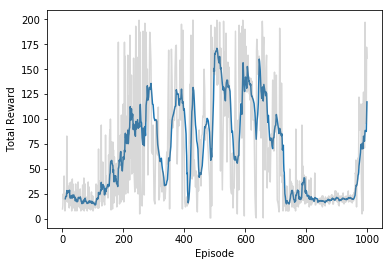

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N

eps, rews = np.array(rewards_list).T
smoothed_rews = running_mean(rews, 10)
plt.plot(eps[-len(smoothed_rews):], smoothed_rews)
plt.plot(eps, rews, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total Reward')